# Homework6.todo.ipynb

## Purpose

This homework is designed to give you practice on creating graphs and charts using the libraries provided in this course.

## Requirements

This is a group assignment.  Take a data set (either one provided, or using your group project data set), develop graphs using elements in your data set.  3 libraries were covered in this module, each student is to create 3 graphs, using each library to create that graph.  No two graphs should be the same. They can use the same style (e.g. 2x line graphs), but must then differ on the data points used.

It's recommended that you get this done very quickly, and as a group review them.  There will be extra things graded in this homework:

1.  Do you include labels, title, and relevant information about the graph.
2.  Does it render properly.
3.  Does the code used to generate said graph make sense, follow best practices as outlined in this course, and so on?


## Required Hand-in

One notebook should be handed in.  Following best practices I've outlined.  This homework is graded as a group homework.  The data set you pick to do graphs off of can be either one I'm providing as part of the repo, or of your group project.

Please label each graph with the original author (in code, comment above the implementation). You may group them by graph type (MatPlotlib all together, Seaborn all together, etc.) or by author (Student A all together, Student B all together, etc.)

Do not use the .todo as your template.  Analysis of the results of each graph isn't necessary, but do indicate the graphs you find represent the data you have most accurately.

## Other notes

This homework will be graded as a group.  Meaning, you all will get the same grade, regardless if a specific student's implementation is poorly done.  It will count for 60 points.  I strongly recommend you discuss as a group who will do what, then meet up at least a few days before the assignment is to be turned in and do a code review and merge of the individual notebooks.

In [1]:
!pip install plotly
import pandas as pd                        
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import plotly.express as px

%matplotlib inline

In [2]:
KO2ndQtrData = pd.read_csv("C:/Users/ariel/Downloads/KO.csv")
KO2ndQtrData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,45.529999,45.680000,44.959999,45.250000,43.839470,16705300
1,2020-07-14,44.910000,45.939999,44.669998,45.869999,44.440140,17080100
2,2020-07-15,46.299999,47.189999,46.200001,46.400002,44.953621,23738000
3,2020-07-16,46.259998,46.689999,45.939999,46.150002,44.711411,13306100
4,2020-07-17,46.470001,46.910000,46.130001,46.820000,45.360523,13899800
...,...,...,...,...,...,...,...
246,2021-07-02,54.000000,54.450001,54.000000,54.180000,54.180000,10604600
247,2021-07-06,53.990002,54.090000,53.549999,53.880001,53.880001,15278200
248,2021-07-07,53.720001,54.380001,53.720001,54.320000,54.320000,14377700
249,2021-07-08,54.009998,54.169998,53.740002,54.130001,54.130001,11943900


In [3]:
KO2ndQtrData['Date']= pd.to_datetime(KO2ndQtrData['Date'],format='%Y-%m-%d')
KO2ndQtrData['Date'] = KO2ndQtrData['Date'].dt.strftime('%m-%d-%Y')
KO2ndQtrData


,Date,Open,High,Low,Close,Adj Close,Volume
0,07-13-2020,45.529999,45.680000,44.959999,45.250000,43.839470,16705300
1,07-14-2020,44.910000,45.939999,44.669998,45.869999,44.440140,17080100
2,07-15-2020,46.299999,47.189999,46.200001,46.400002,44.953621,23738000
3,07-16-2020,46.259998,46.689999,45.939999,46.150002,44.711411,13306100
4,07-17-2020,46.470001,46.910000,46.130001,46.820000,45.360523,13899800
...,...,...,...,...,...,...,...
246,07-02-2021,54.000000,54.450001,54.000000,54.180000,54.180000,10604600
247,07-06-2021,53.990002,54.090000,53.549999,53.880001,53.880001,15278200
248,07-07-2021,53.720001,54.380001,53.720001,54.320000,54.320000,14377700
249,07-08-2021,54.009998,54.169998,53.740002,54.130001,54.130001,11943900


In [4]:
KO2ndQtrData = KO2ndQtrData.loc[(KO2ndQtrData['Date'] >= '04-01-2021')
                     & (KO2ndQtrData['Date'] < '07-01-2021')]

# Matplotlib Graph

In [5]:
#Mean for High, Low, Open, & Close of daily reported stock prices

muHigh=KO2ndQtrData["High"].mean()
muLow=KO2ndQtrData["Low"].mean()
muOpen=KO2ndQtrData["Open"].mean()
muClose=KO2ndQtrData["Close"].mean()


In [6]:
#Standard deviation for High, Low, Open, & Close of daily reported stock prices
stdHigh=np.std(KO2ndQtrData["High"], ddof=1)
stdLow=np.std(KO2ndQtrData["Low"], ddof=1)
stdOpen=np.std(KO2ndQtrData["Open"], ddof=1)
stdClose=np.std(KO2ndQtrData["Close"], ddof=1)

In [7]:
KO2ndQtrData=KO2ndQtrData.assign(Dailyalpha=lambda x: (x.Close+0.42-x.Open) / x.Open)


In [8]:
alphaAvg=KO2ndQtrData["Dailyalpha"].mean()
alphaAvg

0.00737071853516879

Text(0, 0.5, 'Frequency')

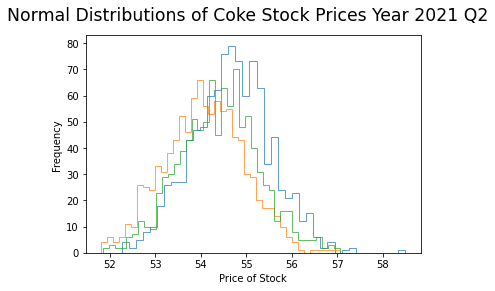

In [9]:
x1=np.random.normal(muHigh,stdHigh,1000)
x2=np.random.normal(muLow,stdLow,1000)
x3=np.random.normal(muOpen,stdOpen,1000)
x4=np.random.normal(muClose,stdClose,1000)

kwargs=dict(histtype='step', alpha=0.7, bins = 40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.suptitle('Normal Distributions of Coke Stock Prices Year 2021 Q2', ha='center', fontsize='xx-large')
plt.xlabel('Price of Stock')
plt.ylabel('Frequency')

## Seaborn Graph

<Figure size 1800x1800 with 0 Axes>

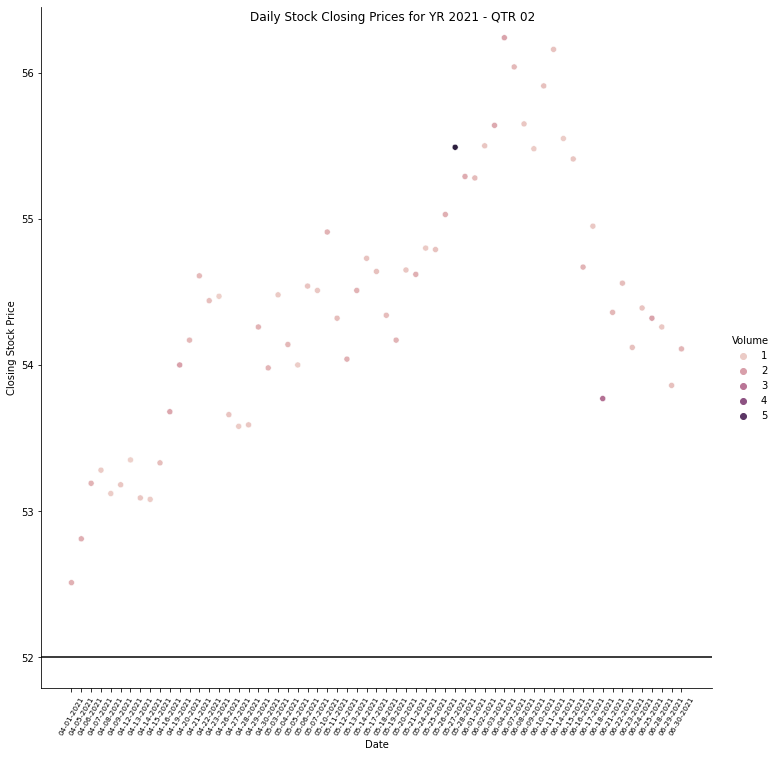

<Figure size 1800x1800 with 0 Axes>

In [22]:
Y21Q2=sns.relplot(data=KO2ndQtrData, x="Date", y="Close",hue="Volume",height=10)
Y21Q2.map(plt.axhline, y=52, color="k")
Y21Q2.set_axis_labels( "Date","Closing Stock Price")
Y21Q2.fig.suptitle("Daily Stock Closing Prices for YR 2021 - QTR 02")
x_dates = KO2ndQtrData['Date'].sort_values(ascending=True).unique()
Y21Q2.set_xticklabels(labels=x_dates, rotation=60, fontsize=7.5)
plt.figure(figsize = (25,25))


## Plotly Graph

In [23]:
fig = px.pie(KO2ndQtrData["Volume"], values='Volume', title='Volume Rate per Date YR2021 Q02')
fig.show()